In [1]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ctrace
from ctrace.simulation import *

In [3]:
with open(ctrace.PROJECT_ROOT /"output"/"saved_timer[aD8g5]" / "results.csv", "r") as csv:
    df = pd.read_csv(csv)
df

,G,p,method,budget,from_cache,value,isOptimal,maxD,duration
0,montgomery,0.078,dependent,400,ca15.json,626.821383,-1,28,1.279350
1,montgomery,0.078,dependent,400,ca15.json,626.829639,-1,28,1.276498
2,montgomery,0.078,dependent,400,nb15.json,801.174060,-1,27,3.017585
3,montgomery,0.078,dependent,400,nb15.json,801.094539,-1,27,3.260710
4,montgomery,0.078,dependent,400,qa7.json,4003.907516,-1,59,10.394865
...,...,...,...,...,...,...,...,...,...
16627,montgomery,0.078,weighted,1000,pb6.json,2367.331254,-1,71,5.444495
16628,montgomery,0.078,weighted,1000,xa6.json,3386.117068,-1,54,5.338927
16629,montgomery,0.078,weighted,1000,xa6.json,3386.117068,-1,54,5.639993
16630,montgomery,0.078,weighted,1000,mb8.json,4967.774573,-1,43,6.703682


In [7]:
table = pd.pivot_table(df, values=['duration'], index=['budget'], columns=['method'], aggfunc=np.average)
table

duration          
method  dependent  weighted
budget                     
400     25.845827  5.162268
500     24.264902  5.142234
600     25.234318  5.141888
700     28.806649  5.144777
800     29.145792  5.212630
900     23.504385  5.133737
1000    26.621504  5.049035

In [10]:
# Compute different sizes of I
json_dir = PROJECT_ROOT / "data" / "SIR_Cache" / "time_trials"
cache_paths = [f for f in json_dir.iterdir()]
len(cache_paths)

594

In [13]:
from ctrace.dataset import load_sir_path
size_dicts = {}
for path in cache_paths:
    SIR = load_sir_path(path, merge=True)
    filename = path.name
    size_dicts[filename] = len(SIR["I"])


In [19]:
df["I_size"] = [size_dicts[i] for i in df["from_cache"]]

In [28]:
df.to_csv("time_trial_sizes.csv")

In [36]:
filtered = {i: df[df["budget"] == i] for i in range(400, 1001, 100)}

In [37]:
filtered[400]

,G,p,method,budget,from_cache,value,isOptimal,maxD,duration,I_size
0,montgomery,0.078,dependent,400,ca15.json,626.821383,-1,28,1.279350,1217
1,montgomery,0.078,dependent,400,ca15.json,626.829639,-1,28,1.276498,1217
2,montgomery,0.078,dependent,400,nb15.json,801.174060,-1,27,3.017585,1584
3,montgomery,0.078,dependent,400,nb15.json,801.094539,-1,27,3.260710,1584
4,montgomery,0.078,dependent,400,qa7.json,4003.907516,-1,59,10.394865,2359
...,...,...,...,...,...,...,...,...,...,...
2372,montgomery,0.078,weighted,400,pb6.json,2552.014685,-1,71,5.139743,1300
2374,montgomery,0.078,weighted,400,xa6.json,3576.741958,-1,54,5.780439,1972
2375,montgomery,0.078,weighted,400,xa6.json,3576.741958,-1,54,5.932842,1972
2376,montgomery,0.078,weighted,400,mb8.json,5162.295947,-1,43,6.810847,3391


<AxesSubplot:xlabel='I_size', ylabel='duration'>

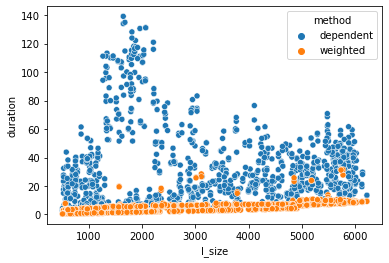

In [42]:
sns.scatterplot(data=filtered[800], x="I_size", y="duration", hue="method")

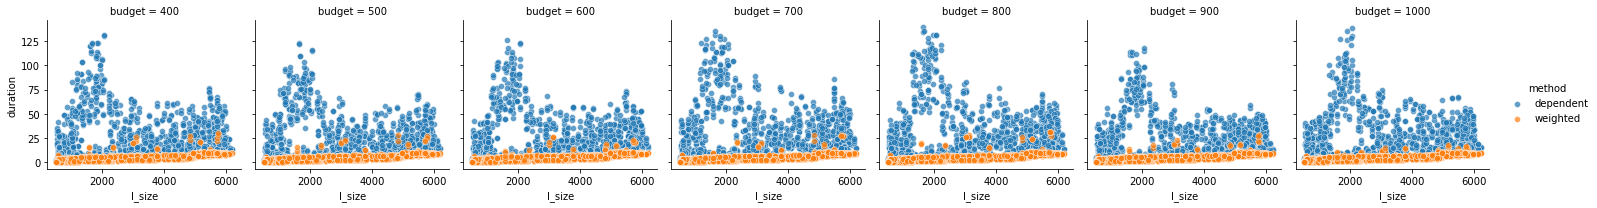

In [44]:
g = sns.FacetGrid(df, col="budget", hue="method")
g.map(sns.scatterplot, "I_size", "duration", alpha=.7)
g.add_legend()

<AxesSubplot:xlabel='from_cache', ylabel='value'>

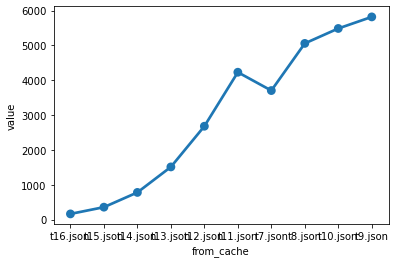

In [14]:

sns.pointplot(data=df, x="from_cache", y='value', ci=95)
